In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
!pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 837.5 kB/s eta 0:01:08
    --------------------------------------- 0.8/56.8 MB 958.5 kB/s eta 0:00:59
    --------------------------------------- 1.0/56.8 MB 967.3 kB/s eta 0:00:58
    --------------------------------------- 1.3/56.8 MB 944.7 kB/s eta 0:00:59
    --------------------------------------- 1.3/56.8 MB 944.7 kB/s eta 0:00:59
   - -------------------------------------- 1.6/56.8 MB 942.3 kB/s eta 0:00:59
   - -------------------------------------- 1.8/56.8 MB 915.0 kB/s eta 0:01:01
   - -------------------------------------- 2.1/56.8 MB 917.5 kB/s eta 0:01:00
   - -------------------------------------- 2.1/56.8 MB 917.5 kB/s eta 0:01:00
   - ----


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_csv("database_clean.csv")

In [5]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,pickup_dow,is_weekend,price_per_km
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323,19,3,0,4.455474
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590,20,4,0,3.133151
2,2009-08-24 21:45:00.00000061,12.9,2009-01-11 13:07:00+00:00,-74.005043,40.740770,-73.980170,40.772647,1.0,4.117407,13,6,1,3.133040
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.752503,-73.965316,40.803349,3.0,5.726622,8,4,0,0.925502
4,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1.0,0.000000,2,5,1,4.900000


In [6]:
df1 = df.copy()

In [7]:
df1 = df1.drop(columns=['key','pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'])

In [8]:
df.shape

(42508, 13)

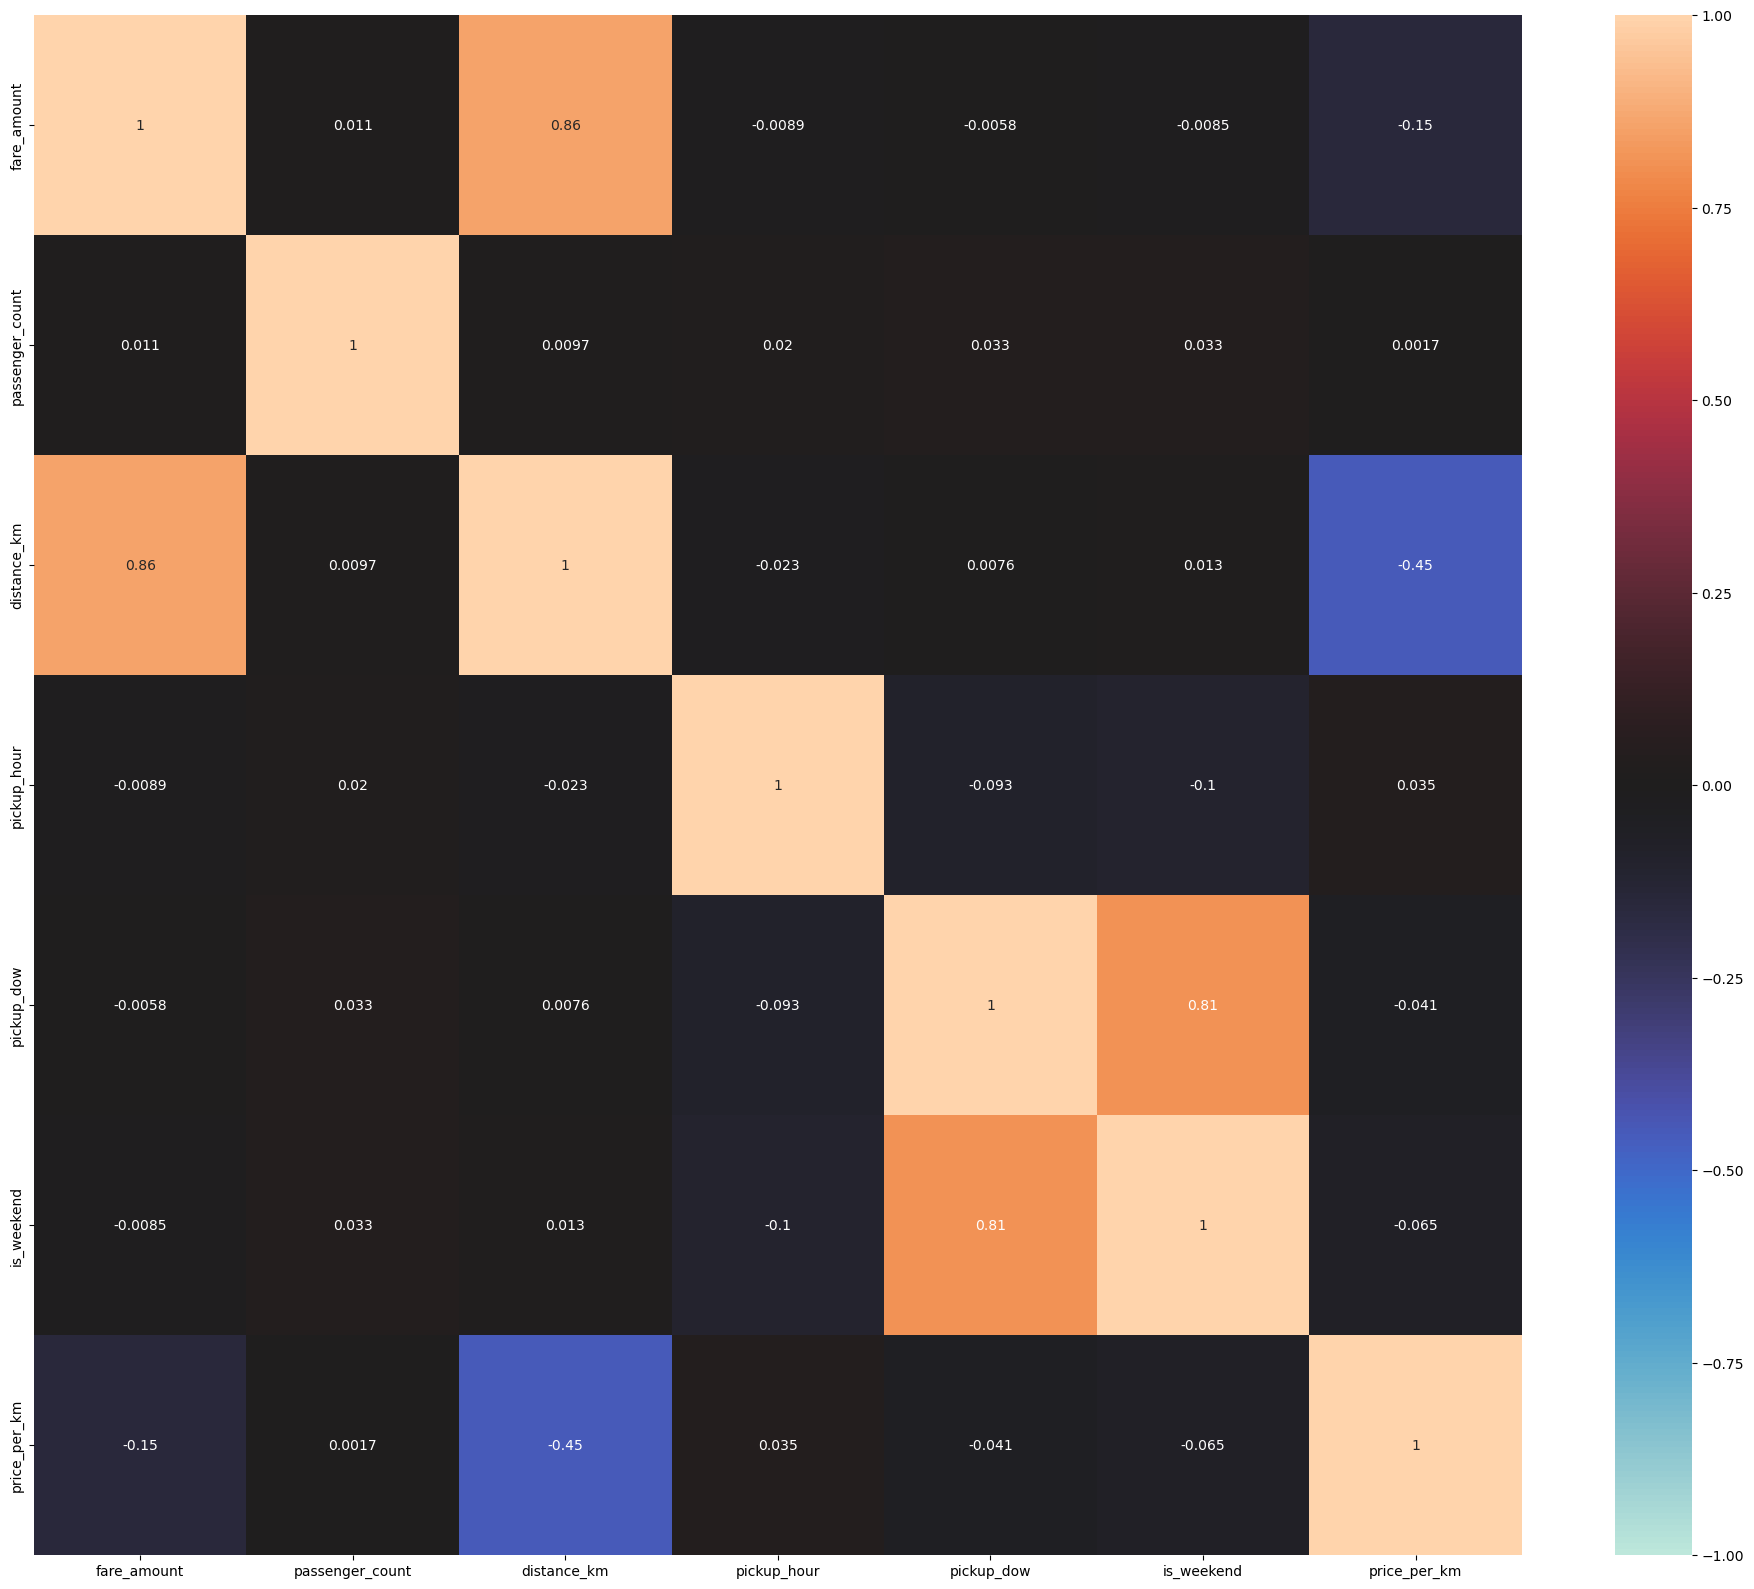

In [9]:
plt.figure(figsize=[24,20])
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, center=0) 
plt.show()

In [10]:
df = df.drop(columns=['key'])

features = ['passenger_count', 'distance_km', 'pickup_hour', 'pickup_dow', 'is_weekend']
target = 'fare_amount'

X = df[features]
y = df[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### standardisation

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Les modèles supervisés

## 1. Régression Linéaire

In [13]:
pipeline = LinearRegression()

In [14]:
pipeline.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
y_pred = pipeline.predict(X_test_scaled)

In [16]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print("RMSE : ", rmse)
print("MAE : ", mae)
print("R2 : ", r2)

RMSE :  4.8840630754620165
MAE :  2.445623880822498
R2 :  0.7032316441872806


In [18]:
y_pred

array([ 4.06744558,  7.85303865,  7.21621758, ...,  6.12882094,
        6.09190505, 25.03972994])

In [19]:
y_test

10883     2.5
5771      6.1
24960     6.5
13374     6.9
10859     5.5
         ... 
7948      4.9
5371     12.5
7775      5.5
6388      8.0
22364    17.4
Name: fare_amount, Length: 8502, dtype: float64

## 2.XGBoost

In [20]:
xgb_model = xgb.XGBRegressor(
    n_estimators=200,  
    learning_rate=0.1,  
    max_depth=6,      
    subsample=0.8,     
    colsample_bytree=0.8,
    random_state=42
)

In [21]:
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [22]:
y_pred = xgb_model.predict(X_test)


In [23]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 18.75686584499024
RMSE: 4.330919745849632
R²: 0.7666459542912882


## 3.Random Forest + Gradient Boosting

In [24]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

results = {}

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

In [26]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    print(f"\n{name}:")
    print(f"  MAE = {mae:.2f}")
    print(f"  RMSE = {rmse:.2f}")
    print(f"  R² = {r2:.3f}")


Random Forest:
  MAE = 2.60
  RMSE = 4.44
  R² = 0.755

Gradient Boosting:
  MAE = 2.33
  RMSE = 4.00
  R² = 0.801


In [27]:
# Récupérer le modèle Random Forest
rf_model = models["Random Forest"]

# S'assurer qu'il est déjà entraîné
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Save the model

In [29]:
import joblib
joblib.dump(rf_model, "uber_rf_model.pkl")

['uber_rf_model.pkl']

In [68]:
# Importance des features
importance = rf_model.feature_importances_

# Mettre dans un DataFrame pour plus de clarté
feat_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)
print(feat_importance)

           Feature  Importance
1      distance_km    0.905613
2      pickup_hour    0.048467
3       pickup_dow    0.026694
0  passenger_count    0.015898
4       is_weekend    0.003328


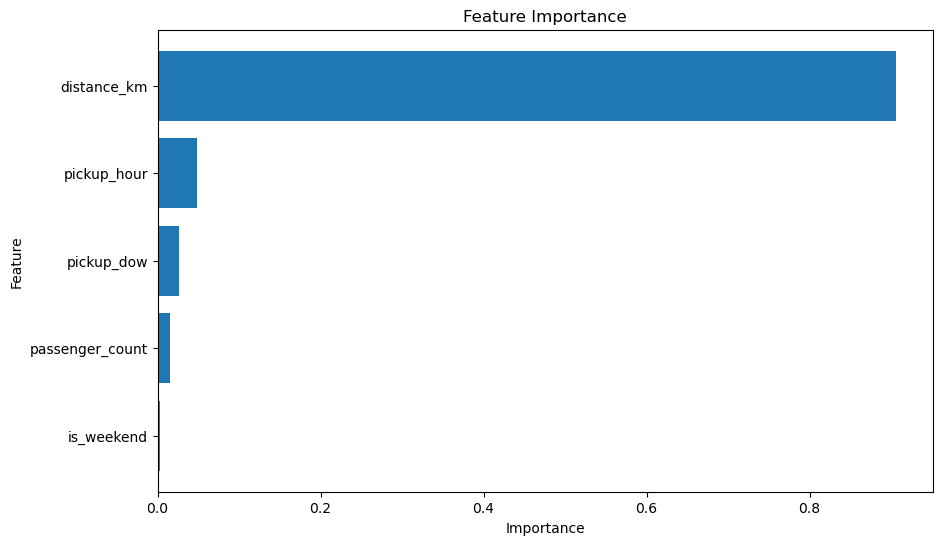

In [70]:
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Pour avoir la plus importante en haut
plt.show()

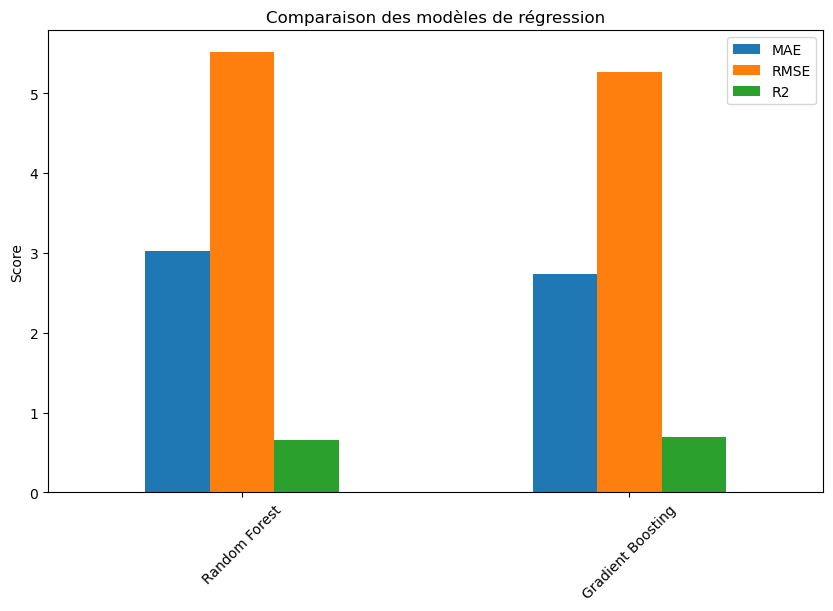

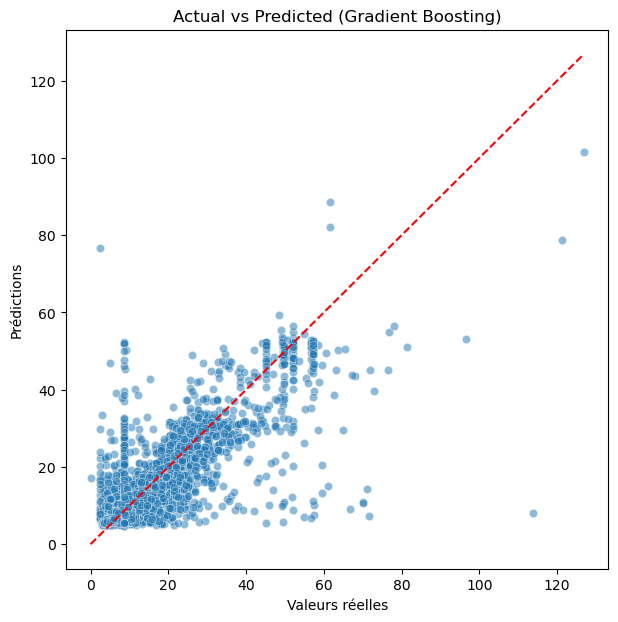

In [71]:
# # 5.Comparaison graphique des modèles
# res_df = pd.DataFrame(results).T
# res_df.plot(kind="bar", figsize=(10,6))
# plt.title("Comparaison des modèles de régression")
# plt.ylabel("Score")
# plt.xticks(rotation=45)
# plt.show()

# # 6. Visualisation Predicted vs Actual pour le meilleur modèle
# best_model_name = res_df['RMSE'].idxmin()
# best_model = models[best_model_name]
# y_pred_best = best_model.predict(X_test)

# plt.figure(figsize=(7,7))
# sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
# plt.xlabel("Valeurs réelles")
# plt.ylabel("Prédictions")
# plt.title(f"Actual vs Predicted ({best_model_name})")
# plt.show()

## 5.KNN

In [143]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [144]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [145]:
y_pred = knn_model.predict(X_test_scaled)

In [146]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f} $')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f} $')
print(f"R² (Coefficient de Détermination) = {r2:.3f}")

Mean Absolute Error (MAE): 2.61 $
Root Mean Squared Error (RMSE): 4.38 $
R² (Coefficient de Détermination) = 0.762


# Le modèle Non Supervisé : Clustring

In [173]:
# Variables pertinentes pour le clustering
features = ["distance_km", "fare_amount", "passenger_count", "pickup_hour", "is_weekend", "pickup_dow"]
X = df[features]

In [175]:
# Standardisation (très important pour KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

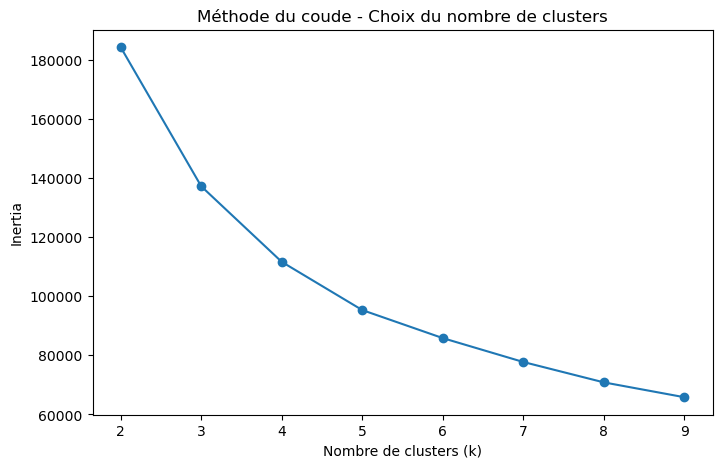

In [177]:
# 1. Choix du nombre optimal de clusters (Méthode du coude / Elbow)
inertia = []
K = range(2, 10)  # tester de 2 à 9 clusters
for k in K:
     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
     kmeans.fit(X_scaled)
     inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker="o")
plt.title("Méthode du coude - Choix du nombre de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [178]:
# 2. Appliquer KMeans avec le nombre optimal (exemple k=4)
k_optimal = 4  # tu peux changer après avoir vu le graphique
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)


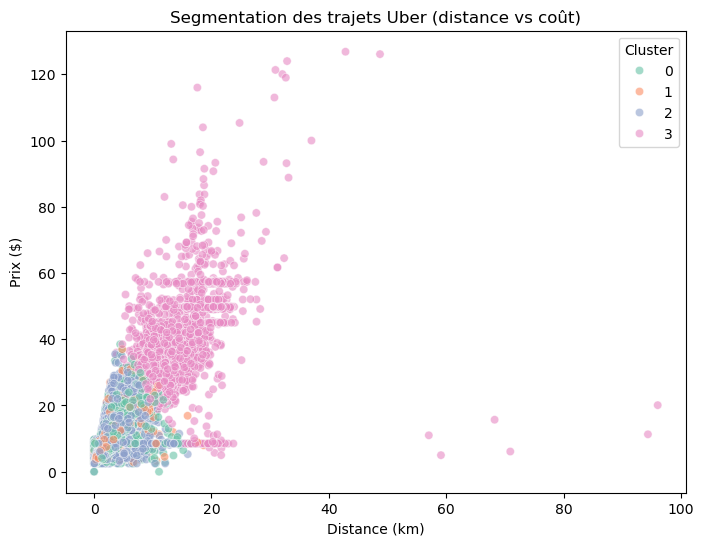

In [179]:
# 3. Visualisation simple (distance vs coût)
plt.figure(figsize=(8,6))
sns.scatterplot(x="distance_km", y="fare_amount", hue="cluster", data=df, palette="Set2", alpha=0.6)
plt.title("Segmentation des trajets Uber (distance vs coût)")
plt.xlabel("Distance (km)")
plt.ylabel("Prix ($)")
plt.legend(title="Cluster")
plt.show()

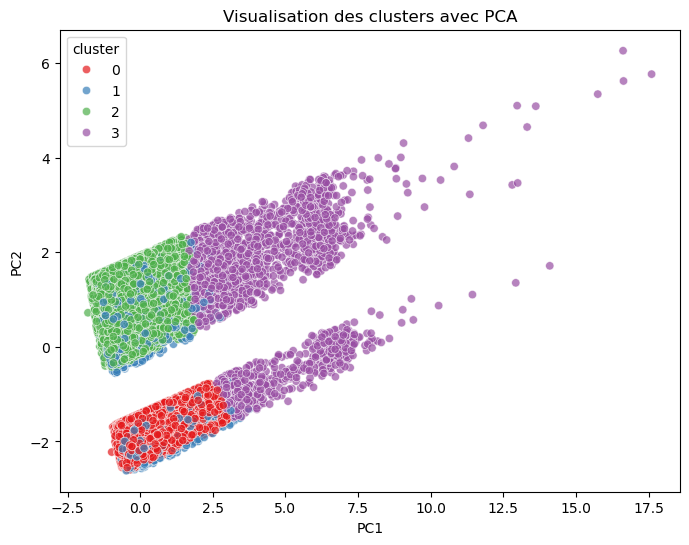

In [180]:
# 4. Réduction dimensionnelle avec PCA pour visualiser en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["cluster"] = df["cluster"]

plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=df_pca, palette="Set1", alpha=0.7)
plt.title("Visualisation des clusters avec PCA")
plt.show()


In [181]:
# 5. Analyse des clusters
cluster_summary = df.groupby("cluster")[features].mean()
print("Moyenne des variables par cluster :")
print(cluster_summary)
# Variance expliquée par PCA
print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)
print("Variance totale expliquée :", pca.explained_variance_ratio_.sum())

Moyenne des variables par cluster :
         distance_km  fare_amount  passenger_count  pickup_hour  is_weekend  \
cluster                                                                       
0           2.800684     9.290201         1.346431    12.406688    1.000000   
1           2.818656     9.590027         5.041106    13.972841    0.315146   
2           2.562358     9.075489         1.227750    13.898510    0.000000   
3          14.310283    38.703115         1.582951    13.276758    0.271407   

         pickup_dow  
cluster              
0          5.555546  
1          3.204796  
2          2.087586  
3          3.016437  
Variance expliquée par chaque composante : [0.31020729 0.30523896]
Variance totale expliquée : 0.6154462461164703
